In [4]:
from scipy import stats
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('F:\\UW TACOMA\\Final Project Dr Lloyd\\cloud performance\\source codes\\forked\\SAAF_4min_5sec_weekend\\SAAF\\test\\all_containers_data.csv')
df.head()

,1_run_id,2_thread_id,containerID,contextSwitches,contextSwitchesDelta,cpuCores,cpuIdle,cpuIdleDelta,cpuIowait,cpuIowaitDelta,...,runtimeOverlap,startTime,totalMemory,userRuntime,uuid,value,vmID,vmcpusteal,vmcpustealDelta,vmuptime
0,0,1,2021/04/08/[$LATEST]384c1d5104a64e7ebf4a0c9962...,83221,122,2,1228510,46,29,0,...,0.47,1617887768914,1719232,415,7dee1b77-6f81-4fd4-8b88-3ecfeb62df95,uuid=c262a644-5d37-4623-87e4-e56f780e5be6 task...,UsjfLy,356,3,1617881621
1,0,0,2021/04/08/[$LATEST]eb9441b77fc84ac4b8f886d6f3...,58558,135,2,888194,46,19,0,...,0.94,1617880329421,1719232,398,95472ae9-3ac6-4159-ac4c-14e5337bba0d,uuid=5064590d-14be-43ce-9fec-161f62acd068 task...,QE7xyZ,292,0,1617875884
2,0,1,2021/04/08/[$LATEST]f1024a59054e4114b8fc7a7d5d...,44052,203,2,851640,53,16,0,...,1.30,1617916810161,1719232,450,c1a38230-bd27-401b-85e2-a20aa2534c97,uuid=768f8aa9-ad95-4497-9d33-08b34ae18fe3 task...,wqZdDV,171,0,1617912550
3,0,6,2021/04/08/[$LATEST]e95506a449744df49cb0d03cce...,56129,138,2,1218625,64,19,0,...,2.11,1617924490298,1719232,527,4dcf27bc-97fe-43e8-91bf-712475795f1a,uuid=e2108aa5-6c96-4bcd-a9b3-08da8a5de221 task...,aquv3Y,348,6,1617918394
4,0,0,2021/04/08/[$LATEST]ce92843df9f044a995b22b7039...,80834,135,2,2129015,53,20,0,...,0.62,1617894489548,1719232,458,6e0c2407-44fb-4a51-b21b-70bad965e0d9,uuid=02d91d1e-a9e5-49b0-a1ae-3f1173acb044 task...,1O2wcP,149,2,1617883841


In [6]:
df = df.drop(['value'], axis = 1)
df = df.drop(['payload'], axis = 1)
df.dtypes

1_run_id                    int64
2_thread_id                 int64
containerID                object
contextSwitches             int64
contextSwitchesDelta        int64
cpuCores                    int64
cpuIdle                     int64
cpuIdleDelta                int64
cpuIowait                   int64
cpuIowaitDelta              int64
cpuIrq                      int64
cpuIrqDelta                 int64
cpuKrn                      int64
cpuKrnDelta                 int64
cpuModel                    int64
cpuNice                     int64
cpuNiceDelta                int64
cpuSoftIrq                  int64
cpuSoftIrqDelta             int64
cpuType                    object
cpuUsr                      int64
cpuUsrDelta                 int64
endTime                     int64
frameworkRuntime            int64
frameworkRuntimeDeltas      int64
freeMemory                  int64
functionMemory              int64
functionName               object
functionRegion             object
latency       

In [7]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
df = df.apply(le.fit_transform)
df.head()

,1_run_id,2_thread_id,containerID,contextSwitches,contextSwitchesDelta,cpuCores,cpuIdle,cpuIdleDelta,cpuIowait,cpuIowaitDelta,...,runtime,runtimeOverlap,startTime,totalMemory,userRuntime,uuid,vmID,vmcpusteal,vmcpustealDelta,vmuptime
0,0,1,256,7831,64,0,5969,21,26,0,...,51,45,5241,0,51,623,685,354,3,486
1,0,0,1098,3725,77,0,3080,21,16,0,...,34,92,3738,0,34,719,580,290,0,365
2,0,1,1119,1533,145,0,2784,28,13,0,...,132,128,11132,0,86,941,1235,169,0,1053
3,0,6,1084,3334,80,0,5883,39,16,0,...,169,205,12691,0,163,369,800,346,6,1126
4,0,0,956,7542,77,0,13527,28,17,0,...,96,60,6606,0,94,556,36,147,2,537


In [8]:
from sklearn.preprocessing import OneHotEncoder
# 1. INSTANTIATE
enc = OneHotEncoder(handle_unknown='ignore')

# 2. FIT
enc.fit(df)

# 3. Transform
onehotlabels = enc.transform(df).toarray()
onehotlabels.shape

(14600, 130340)

In [9]:
df.head()

,1_run_id,2_thread_id,containerID,contextSwitches,contextSwitchesDelta,cpuCores,cpuIdle,cpuIdleDelta,cpuIowait,cpuIowaitDelta,...,runtime,runtimeOverlap,startTime,totalMemory,userRuntime,uuid,vmID,vmcpusteal,vmcpustealDelta,vmuptime
0,0,1,256,7831,64,0,5969,21,26,0,...,51,45,5241,0,51,623,685,354,3,486
1,0,0,1098,3725,77,0,3080,21,16,0,...,34,92,3738,0,34,719,580,290,0,365
2,0,1,1119,1533,145,0,2784,28,13,0,...,132,128,11132,0,86,941,1235,169,0,1053
3,0,6,1084,3334,80,0,5883,39,16,0,...,169,205,12691,0,163,369,800,346,6,1126
4,0,0,956,7542,77,0,13527,28,17,0,...,96,60,6606,0,94,556,36,147,2,537


In [12]:
features = df.columns
X = df[features]
X = X.drop(['runtime'], axis = 1)
#handling the LEVELS seperately 
#hanlding and get the heatmap only based on runtime !!!!!
#get the linear regression between the cpusteal delta and pagefault delta and get the R^2 --pearson corr
# cpusteal delta is not that high
# take the average of the metrics from each categories.
y = df['runtime']

In [28]:
feature_selected_for_linearRegressor = ['contextSwitchesDelta']
X = df[feature_selected_for_linearRegressor]
X.head()

,contextSwitchesDelta
0,64
1,77
2,145
3,80
4,77


In [29]:
#from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape
X_train.head()

,contextSwitchesDelta
7046,1096
4937,521
6647,435
6284,98
5342,60


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

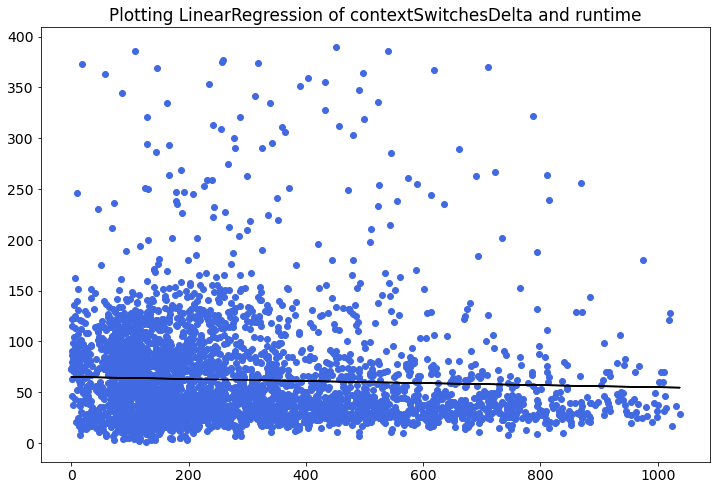

In [47]:
regr = LinearRegression()
regr.fit(X_train, y_train)
#print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
plt.title('Plotting LinearRegression of contextSwitchesDelta and runtime')
plt.scatter(X_test, y_test, color ='royalblue')
plt.plot(X_test, y_pred, color ='k')
plt.show()

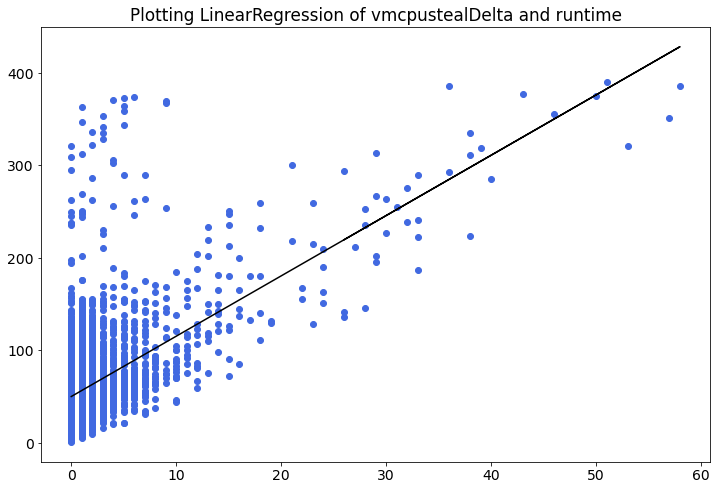

In [48]:
feature_selected_for_linearRegressor = ['vmcpustealDelta']
X = df[feature_selected_for_linearRegressor]
#------------------
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#------------------
regr = LinearRegression()
regr.fit(X_train, y_train)
#------------------
#print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
plt.title('Plotting LinearRegression of vmcpustealDelta and runtime')
plt.scatter(X_test, y_test, color ='royalblue')
plt.plot(X_test, y_pred, color ='k')
plt.show()

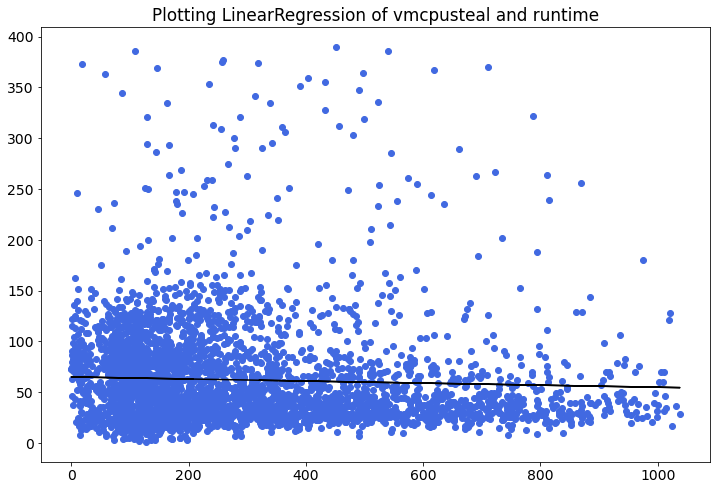

In [49]:
feature_selected_for_linearRegressor = ['vmcpusteal']
X = df[feature_selected_for_linearRegressor]
#------------------
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#------------------
regr = LinearRegression()
regr.fit(X_train, y_train)
#------------------
#print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
plt.title('Plotting LinearRegression of vmcpusteal and runtime')
plt.scatter(X_test, y_test, color ='royalblue')
plt.plot(X_test, y_pred, color ='k')
plt.show()

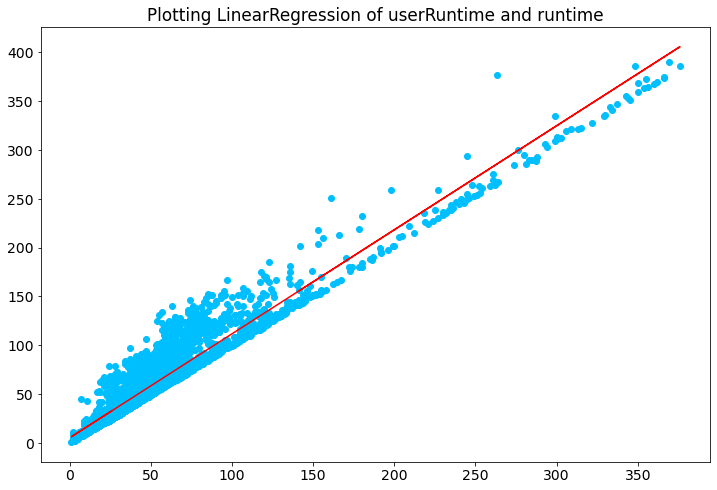

In [55]:
feature_selected_for_linearRegressor = ['userRuntime']
X = df[feature_selected_for_linearRegressor]
#------------------
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#------------------
regr = LinearRegression()
regr.fit(X_train, y_train)
#------------------
#print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
plt.title('Plotting LinearRegression of userRuntime and runtime')
plt.scatter(X_test, y_test, color ='deepskyblue')
plt.plot(X_test, y_pred, color ='red')
plt.show()

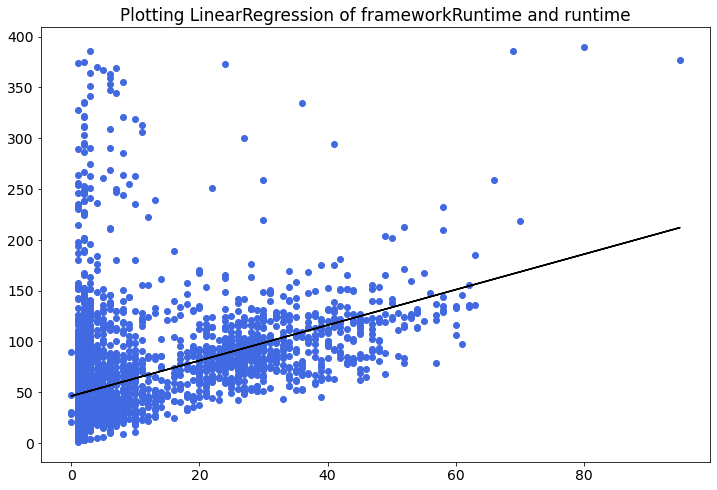

In [51]:
feature_selected_for_linearRegressor = ['frameworkRuntime']
X = df[feature_selected_for_linearRegressor]
#------------------
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#------------------
regr = LinearRegression()
regr.fit(X_train, y_train)
#------------------
#print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
plt.title('Plotting LinearRegression of frameworkRuntime and runtime')
plt.scatter(X_test, y_test, color ='royalblue')
plt.plot(X_test, y_pred, color ='k')
plt.show()

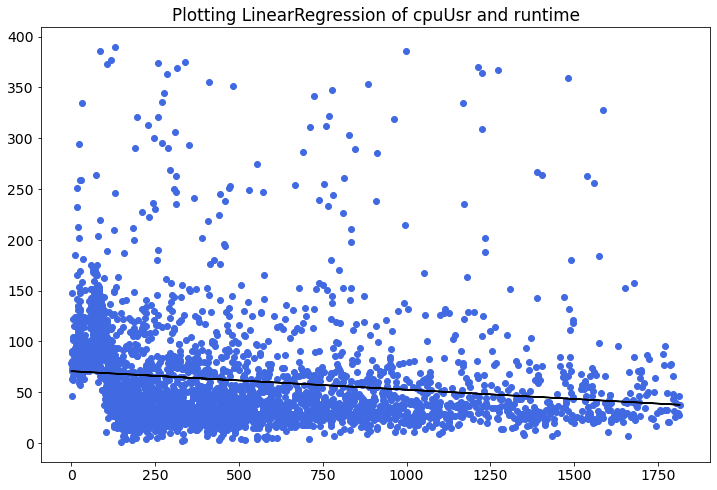

In [52]:
feature_selected_for_linearRegressor = ['cpuUsr']
X = df[feature_selected_for_linearRegressor]
#------------------
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#------------------
regr = LinearRegression()
regr.fit(X_train, y_train)
#------------------
#print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
plt.title('Plotting LinearRegression of cpuUsr and runtime')
plt.scatter(X_test, y_test, color ='royalblue')
plt.plot(X_test, y_pred, color ='k')
plt.show()

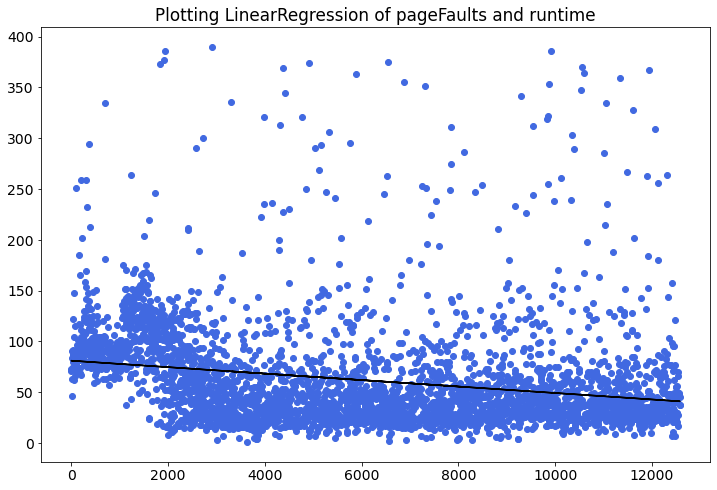

In [53]:
feature_selected_for_linearRegressor = ['pageFaults']
X = df[feature_selected_for_linearRegressor]
#------------------
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#------------------
regr = LinearRegression()
regr.fit(X_train, y_train)
#------------------
#print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
plt.title('Plotting LinearRegression of pageFaults and runtime')
plt.scatter(X_test, y_test, color ='royalblue')
plt.plot(X_test, y_pred, color ='k')
plt.show()

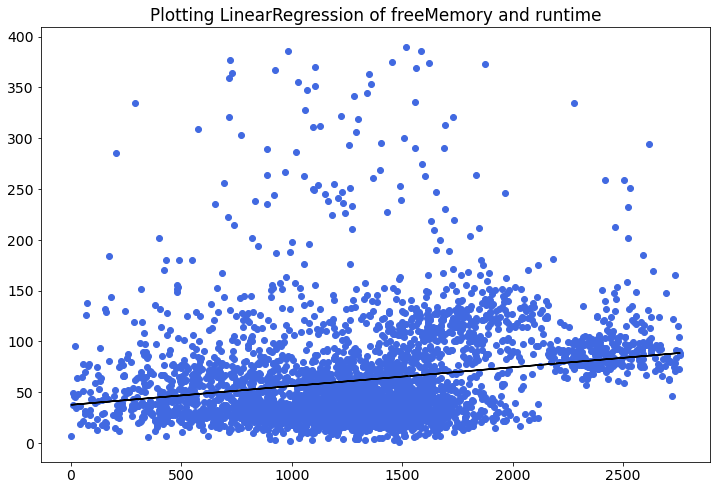

In [54]:
feature_selected_for_linearRegressor = ['freeMemory']
X = df[feature_selected_for_linearRegressor]
#------------------
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#------------------
regr = LinearRegression()
regr.fit(X_train, y_train)
#------------------
#print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
plt.title('Plotting LinearRegression of freeMemory and runtime')
plt.scatter(X_test, y_test, color ='royalblue')
plt.plot(X_test, y_pred, color ='k')
plt.show()